In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
import h5py
import matplotlib.pyplot as plt
import pandas as pd

# random seed for reproducibility
numpy.random.seed(2)

In [2]:
# loading the data
# link to the dataset --> https://www.kaggle.com/uciml/pima-indians-diabetes-database
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# checking misssing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# creating x and y data
X = df.drop(['Outcome'], axis = 1)
Y = df['Outcome']

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
# spliting dataset 30 70 test and train resp
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 ,random_state=5)

In [8]:
# create model, add dense layers one by one specifying activation function
model = Sequential()
# input layer requires input_dim param
model.add(Dense(32, input_dim=8, activation='relu')),    
model.add(Dense(64, activation='relu')),
model.add(Dense(128, activation='relu')),
model.add(Dense(256, activation='relu')),
model.add(Dense(128, activation='relu')),
model.add(Dense(64, activation='relu')),
model.add(Dense(32, activation='relu')),
# model.add(Dense(16, activation='relu')),
 # sigmoid instead of relu for final probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))
    
model.summary()

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2

In [9]:
# call the function to fit to the data (training the network)
history = model.fit(X_train, y_train, epochs=100, batch_size=10,
          validation_data=(X_test, y_test))


Epoch 1/100
54/54 [==============================] - 2s 16ms/step - loss: 1.0521 - accuracy: 0.5226 - val_loss: 0.7971 - val_accuracy: 0.6104
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.6455 - val_loss: 0.7005 - val_accuracy: 0.6147
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6567 - val_loss: 0.5891 - val_accuracy: 0.6883
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.6894 - val_loss: 0.5918 - val_accuracy: 0.6883
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6372 - val_loss: 0.7282 - val_accuracy: 0.5541
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.6218 - val_loss: 0.6206 - val_accuracy: 0.6450
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.7143 - val_loss: 0.5898 - val_accuracy: 0.7056
Epoch 8/100


Epoch 59/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.8186 - val_loss: 0.6539 - val_accuracy: 0.6840
Epoch 60/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4260 - accuracy: 0.7848 - val_loss: 0.6014 - val_accuracy: 0.7100
Epoch 61/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.8454 - val_loss: 0.6641 - val_accuracy: 0.7056
Epoch 62/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.7886 - val_loss: 0.7200 - val_accuracy: 0.6970
Epoch 63/100
54/54 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.7765 - val_loss: 0.6610 - val_accuracy: 0.6753
Epoch 64/100
54/54 [==============================] - 0s 6ms/step - loss: 0.3421 - accuracy: 0.8317 - val_loss: 0.6321 - val_accuracy: 0.7186
Epoch 65/100
54/54 [==============================] - 0s 6ms/step - loss: 0.4267 - accuracy: 0.7925 - val_loss: 0.5944 - val_accuracy: 0.7143
Epoch 

In [10]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
model.save('diabetes_model.h5')

8/8 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.6753


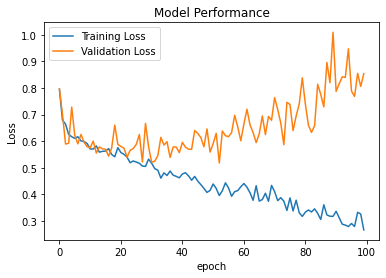

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

# deploying with streamlit
https://docs.streamlit.io/en/stable/deploy_streamlit_app.html#python-dependencies
* sign up with https://streamlit.io/sharing

